<a href="https://colab.research.google.com/github/Rajeev1815/Time-Sereis-Analysis/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import datetime
from google.colab import files
uploaded = files.upload()

Saving NaturalGas.csv to NaturalGas (3).csv


In [124]:
data = pd.read_csv("NaturalGas.csv")

In [125]:
data.sample(7)

,Date,Price,Open,High,Low,Vol.,Change %
132,"Dec 09, 2021",292.300000,291.000000,297.600000,282.300000,90.62K,0.21%
71,"Mar 07, 2022",377.900000,385.600000,400.400000,373.300000,71.71K,-0.21%
70,"Mar 08, 2022",350.400000,376.000000,376.000000,347.900000,76.92K,-7.28%
67,"Mar 11, 2022",364.400000,355.600000,368.400000,355.600000,59.00K,3.38%
502,"Jul 06, 2020",133.900000,132.400000,139.600000,132.000000,245.18K,1.36%
24,"May 12, 2022",598.300000,583.800000,603.500000,562.500000,111.59K,1.25%
80,"Feb 22, 2022",340.000000,356.400000,358.900000,336.900000,22.33K,-4.44%


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      518 non-null    object 
 1   Price     518 non-null    float64
 2   Open      518 non-null    float64
 3   High      518 non-null    float64
 4   Low       518 non-null    float64
 5   Vol.      518 non-null    object 
 6   Change %  518 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.5+ KB


In [127]:
data.shape #total shape number of rows is 518 and so are the null objects in each columns so there are no null values

(518, 7)

In [128]:
data.isnull().sum().sum()

0

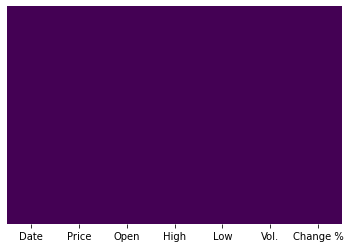

In [129]:
#Another way to check null values using a bar plot
sns.heatmap(data.isnull(),yticklabels = False, cbar = False , cmap ='viridis')
plt.show() #There is only color so no null values

In [130]:
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month
0,"Jun 15, 2022",569.500000,571.300000,573.000000,565.000000,11.54K,-0.61%,6
1,"Jun 14, 2022",573.000000,678.700000,693.300000,551.600000,90.20K,-14.71%,6
2,"Jun 13, 2022",671.800000,688.300000,697.200000,656.600000,107.54K,-2.75%,6
3,"Jun 10, 2022",690.800000,697.800000,712.800000,674.200000,78.64K,-0.07%,6
4,"Jun 09, 2022",691.300000,658.500000,698.200000,625.300000,149.22K,1.01%,6


In [131]:
data['Month_Year'] = pd.to_datetime(data['Date']).dt.to_period('M')
data.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Month,Month_Year
419,"Oct 30, 2020",247.700000,246.500000,249.600000,242.700000,219.82K,0.45%,10,2020-10
61,"Mar 21, 2022",371.200000,374.300000,378.000000,362.100000,66.62K,0.30%,3,2022-03
154,"Nov 09, 2021",370.600000,403.700000,405.400000,365.500000,99.25K,-9.76%,11,2021-11
0,"Jun 15, 2022",569.500000,571.300000,573.000000,565.000000,11.54K,-0.61%,6,2022-06
498,"Jul 10, 2020",137.400000,134.200000,138.300000,131.200000,184.23K,1.40%,7,2020-07


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Date        518 non-null    object   
 1   Price       518 non-null    float64  
 2   Open        518 non-null    float64  
 3   High        518 non-null    float64  
 4   Low         518 non-null    float64  
 5   Vol.        518 non-null    object   
 6   Change %    518 non-null    object   
 7   Month       518 non-null    int64    
 8   Month_Year  518 non-null    period[M]
dtypes: float64(4), int64(1), object(3), period[M](1)
memory usage: 36.5+ KB


In [133]:
indexedData = data.drop(['Open', 'High','Low','Vol.','Change %','Month','Month_Year'], axis = 1)
indexedData

,Date,Price
0,"Jun 15, 2022",569.500000
1,"Jun 14, 2022",573.000000
2,"Jun 13, 2022",671.800000
3,"Jun 10, 2022",690.800000
4,"Jun 09, 2022",691.300000
...,...,...
513,"Jun 19, 2020",128.100000
514,"Jun 18, 2020",126.200000
515,"Jun 17, 2020",123.300000
516,"Jun 16, 2020",123.700000


In [134]:
indexDataSet = indexedData.set_index('Date')
indexDataSet = indexDataSet.loc[::-1]
indexDataSet.sample(7)

,Price
Date,
"Jun 17, 2020",123.300000
"Aug 16, 2021",294.600000
"May 16, 2022",611.900000
"May 04, 2021",219.100000
"Jun 10, 2021",229.200000
"Mar 22, 2022",392.600000
"Sep 30, 2021",428.800000


In [135]:
fig = px.line(indexDataSet, title = "Natural Gas Price over the years", labels = {"Date": "Date","value": "Price",
                                                                                  "variable": "Price"})
fig.show()
#The plot shows that the data is non-stationary but still we confirm it with rolling statistics test.

In [136]:
#Determine the stationarity of the Indexed DataSet
#Using Rolling Statistics Method
rollingmean = indexDataSet.rolling(window = 30).mean()
rollingstd = indexDataSet.rolling(window = 30).std()
print(rollingmean,rollingstd)

                  Price
Date                   
Jun 15, 2020        NaN
Jun 16, 2020        NaN
Jun 17, 2020        NaN
Jun 18, 2020        NaN
Jun 19, 2020        NaN
...                 ...
Jun 09, 2022 645.273333
Jun 10, 2022 649.773333
Jun 13, 2022 653.073333
Jun 14, 2022 651.910000
Jun 15, 2022 649.526667

[518 rows x 1 columns]                  Price
Date                  
Jun 15, 2020       NaN
Jun 16, 2020       NaN
Jun 17, 2020       NaN
Jun 18, 2020       NaN
Jun 19, 2020       NaN
...                ...
Jun 09, 2022 48.050957
Jun 10, 2022 45.643914
Jun 13, 2022 43.411114
Jun 14, 2022 45.098256
Jun 15, 2022 47.519034

[518 rows x 1 columns]


In [137]:
indexDataSet['Mean'] = rollingmean
indexDataSet['Std'] = rollingstd

In [138]:
fig = px.line(indexDataSet, y = indexDataSet.columns , title = "Rolling Mean & Standard Deviation", labels = 
              {"Date": "Date","value": "Price","variable": "Features"} )
fig.show()

#### Using above test, it can be seen that the data is not stationary as the rolling mean follows a trend. So, taking logarithm of the dataset and then using the rolling statistics method.

In [139]:
#Estimating the trend for the given DataSet
indexDataSet = indexDataSet.drop(['Mean', 'Std'], axis = 1)
indexDataSet_logScale = np.log(indexDataSet)

In [140]:
fig = px.line(indexDataSet_logScale, title = "Logarithm Scale of Natural Gas Prices", labels = {"Date": "Date",
                                                    "value":"Log(Price)","variable": "Log(Price)"})
fig.show()

In [141]:
movingmean = indexDataSet_logScale.rolling(window = 30).mean()
movingstd = indexDataSet_logScale.rolling(window = 30).std()
indexDataSet_logScale['Mean'] = movingmean
indexDataSet_logScale['Std'] = movingstd
fig = px.line(indexDataSet_logScale, y = indexDataSet_logScale.columns , title = "Rolling Mean & Standard Deviation for Logarithmic scale", labels = 
              {"Date": "Date","value": "Price","variable": "Features"} )
fig.show()

In [142]:
indexDataSet_logScale = indexDataSet_logScale.drop(['Mean', 'Std'], axis = 1)
dataset_logScale_minusMovingmean = indexDataSet_logScale - movingmean
dataset_logScale_minusMovingmean.dropna(inplace = True)
dataset_logScale_minusMovingmean.head()

,Price
Date,
"Jul 24, 2020",0.036132
"Jul 27, 2020",0.012062
"Jul 28, 2020",0.024251
"Jul 29, 2020",0.103735
"Jul 30, 2020",0.054695


In [143]:
movingmean = dataset_logScale_minusMovingmean.rolling(window = 30).mean()
movingstd = dataset_logScale_minusMovingmean.rolling(window = 30).std()
dataset_logScale_minusMovingmean['Mean'] = movingmean
dataset_logScale_minusMovingmean['Std'] = movingstd
fig = px.line(dataset_logScale_minusMovingmean, y = dataset_logScale_minusMovingmean.columns , 
              title = "Rolling Mean & Standard Deviation", labels = 
              {"Date": "Date","value": "Price","variable": "Feature"} )
fig.show()

##### From the above two plots, it can be seen that that dataset now can be considered stationary thus Time Series Analysis can be now applied.

In [144]:
# Creating 7 and 21 days Moving Average

indexDataSet['ma7'] = indexDataSet['Price'].rolling(window=7).mean() 
indexDataSet['ma20'] = indexDataSet['Price'].rolling (window=20).mean()

# Creating MACD

indexDataSet['26_ema'] = indexDataSet['Price'].ewm(span=26).mean().fillna(0) 
indexDataSet['12_ema'] = indexDataSet['Price'].ewm(span=12).mean().fillna(0)
indexDataSet['macd'] = indexDataSet['12_ema'] - indexDataSet['26_ema']

# Creating Bollinger Bands
#Set number of days and standard deviations to use for rolling Lookback period for Bollinger band calculation
window = 20
no_of_std = 2

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = indexDataSet['Price'].rolling (window).mean()
rolling_std = indexDataSet['Price'].rolling (window).std() 

#create two new DataFrame columns to hold values of upper and Lower Bollinger bands
#B['Rolling Mean'] = rolling mean.fillna(0) 
indexDataSet['Bollinger High'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
indexDataSet['Bollinger Low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)

# Creating Exponential moving average
indexDataSet['ema'] = indexDataSet['Price'].ewm(com=0.5).mean()

# Creating Momentum
indexDataSet['Momentum'] = indexDataSet['Price']-1

indexDataSet.head()

,Price,ma7,ma20,26_ema,12_ema,macd,Bollinger High,Bollinger Low,ema,Momentum
Date,,,,,,,,,,
"Jun 15, 2020",128.200000,NaN,NaN,128.200000,128.200000,0.000000,0.000000,0.000000,128.200000,127.200000
"Jun 16, 2020",123.700000,NaN,NaN,125.863462,125.762500,-0.100962,0.000000,0.000000,124.825000,122.700000
"Jun 17, 2020",123.300000,NaN,NaN,124.942435,124.801386,-0.141049,0.000000,0.000000,123.769231,122.300000
"Jun 18, 2020",126.200000,NaN,NaN,125.293995,125.242874,-0.051121,0.000000,0.000000,125.410000,125.200000
"Jun 19, 2020",128.100000,NaN,NaN,125.944719,126.019145,0.074425,0.000000,0.000000,127.210744,127.100000


In [145]:
indexDataSet = indexDataSet.drop(['ma7','ma20','26_ema','12_ema','macd','Bollinger High','Bollinger Low','ema','Momentum'], axis = 1)
train_data = indexDataSet['Jun 15, 2020' : 'Jan 04, 2022']
test_data = indexDataSet['Jan 05, 2022' :]
print('Observations: %d' %(len(indexDataSet)))
print('Train Data Set :', train_data.shape)
print('Test Data Set :', test_data.shape)

Observations: 518
Train Data Set : (404, 1)
Test Data Set : (114, 1)


In [146]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_data_scaled = scaler.fit_transform(train_data)

In [147]:
X_train = []
y_train = []
for i in range(60, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train); print(); print(y_train)

[[0.04356271 0.03107658 0.0299667  ... 0.19478357 0.19284129 0.20810211]
 [0.03107658 0.0299667  0.03801332 ... 0.19284129 0.20810211 0.20976693]
 [0.0299667  0.03801332 0.04328524 ... 0.20810211 0.20976693 0.18867925]
 ...
 [0.8590455  0.81354051 0.83740289 ... 0.5291343  0.51664817 0.4508879 ]
 [0.81354051 0.83740289 0.84628191 ... 0.51664817 0.4508879  0.45504994]
 [0.83740289 0.84628191 0.8917869  ... 0.4508879  0.45504994 0.45976693]]

[0.20976693 0.18867925 0.17674806 0.16870144 0.15510544 0.16148724
 0.17203108 0.15122087 0.10599334 0.1054384  0.06187569 0.06076582
 0.11570477 0.1481687  0.14567148 0.25665927 0.21032186 0.20532741
 0.1945061  0.2300222  0.20976693 0.21642619 0.22475028 0.24778024
 0.2791343  0.27108768 0.23529412 0.2536071  0.2599889  0.24611543
 0.28246393 0.3063263  0.3054939  0.29716981 0.30188679 0.31714761
 0.36459489 0.37208657 0.37513873 0.3590455  0.32408435 0.31853496
 0.30299667 0.28357381 0.27830189 0.29800222 0.29605993 0.31409545
 0.31631521 0.30854

In [148]:
#Reshaping the data since tensor accepts 3D shape (batch_size, timesteps, input_dim).
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print()
print(X_train)

(344, 60, 1)

[[[0.04356271]
  [0.03107658]
  [0.0299667 ]
  ...
  [0.19478357]
  [0.19284129]
  [0.20810211]]

 [[0.03107658]
  [0.0299667 ]
  [0.03801332]
  ...
  [0.19284129]
  [0.20810211]
  [0.20976693]]

 [[0.0299667 ]
  [0.03801332]
  [0.04328524]
  ...
  [0.20810211]
  [0.20976693]
  [0.18867925]]

 ...

 [[0.8590455 ]
  [0.81354051]
  [0.83740289]
  ...
  [0.5291343 ]
  [0.51664817]
  [0.4508879 ]]

 [[0.81354051]
  [0.83740289]
  [0.84628191]
  ...
  [0.51664817]
  [0.4508879 ]
  [0.45504994]]

 [[0.83740289]
  [0.84628191]
  [0.8917869 ]
  ...
  [0.4508879 ]
  [0.45504994]
  [0.45976693]]]


In [149]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [150]:
model = tf.keras.Sequential()
# adding 1st LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
# adding 2nd LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
# adding 3rd LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
# adding 4th LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
# adding output layer
model.add(tf.keras.layers.Dense(units=1))
#compiling RNN
model.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='loss', patience=10)
# fitting RNN on training set
model.fit(X_train, y_train, epochs= 100, batch_size=32, 
          verbose=2, callbacks=[early_stopping])

Epoch 1/100
11/11 - 12s - loss: 0.0775 - 12s/epoch - 1s/step
Epoch 2/100
11/11 - 3s - loss: 0.0315 - 3s/epoch - 255ms/step
Epoch 3/100
11/11 - 3s - loss: 0.0173 - 3s/epoch - 258ms/step
Epoch 4/100
11/11 - 1s - loss: 0.0145 - 1s/epoch - 136ms/step
Epoch 5/100
11/11 - 1s - loss: 0.0116 - 1s/epoch - 117ms/step
Epoch 6/100
11/11 - 1s - loss: 0.0102 - 1s/epoch - 116ms/step
Epoch 7/100
11/11 - 1s - loss: 0.0101 - 1s/epoch - 117ms/step
Epoch 8/100
11/11 - 1s - loss: 0.0099 - 1s/epoch - 116ms/step
Epoch 9/100
11/11 - 1s - loss: 0.0095 - 1s/epoch - 117ms/step
Epoch 10/100
11/11 - 1s - loss: 0.0087 - 1s/epoch - 119ms/step
Epoch 11/100
11/11 - 1s - loss: 0.0068 - 1s/epoch - 118ms/step
Epoch 12/100
11/11 - 1s - loss: 0.0065 - 1s/epoch - 117ms/step
Epoch 13/100
11/11 - 1s - loss: 0.0088 - 1s/epoch - 117ms/step
Epoch 14/100
11/11 - 1s - loss: 0.0070 - 1s/epoch - 115ms/step
Epoch 15/100
11/11 - 1s - loss: 0.0067 - 1s/epoch - 115ms/step
Epoch 16/100
11/11 - 1s - loss: 0.0068 - 1s/epoch - 115ms/step
Ep

In [151]:
dataset_total = pd.concat((train_data, test_data), axis=0)
print(dataset_total)
inputs = dataset_total[len(dataset_total) - len(test_data)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs) # transforming input data
X_test = []
y_test = []

for i in range (60, 174):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(train_data_scaled[i,0])
      
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

                  Price
Date                   
Jun 15, 2020 128.200000
Jun 16, 2020 123.700000
Jun 17, 2020 123.300000
Jun 18, 2020 126.200000
Jun 19, 2020 128.100000
...                 ...
Jun 09, 2022 691.300000
Jun 10, 2022 690.800000
Jun 13, 2022 671.800000
Jun 14, 2022 573.000000
Jun 15, 2022 569.500000

[518 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



[[296.87738]
 [298.1744 ]
 [299.41718]
 [300.65808]
 [301.97562]
 [303.4494 ]
 [305.3486 ]
 [307.81152]
 [310.84244]
 [314.35913]
 [318.29352]
 [322.43683]
 [326.51883]
 [330.29333]
 [333.5848 ]
 [336.24197]
 [338.33054]
 [340.18033]
 [342.17072]
 [344.54974]
 [347.74622]
 [351.88684]
 [356.83307]
 [362.15308]
 [367.3738 ]
 [371.99203]
 [375.62097]
 [377.95078]
 [378.91806]
 [378.64514]
 [377.4377 ]
 [375.60693]
 [373.45175]
 [371.30676]
 [369.41   ]
 [367.87836]
 [366.87402]
 [366.39005]
 [366.34213]
 [366.6983 ]
 [367.42984]
 [368.53775]
 [370.1103 ]
 [372.20633]
 [374.7041 ]
 [377.4028 ]
 [380.10028]
 [382.70517]
 [385.11768]
 [387.2231 ]
 [388.99207]
 [390.50046]
 [391.83368]
 [393.04138]
 [394.2617 ]
 [395.67166]
 [397.4879 ]
 [399.91547]
 [403.03427]
 [406.79062]
 [411.1161 ]
 [415.96228]
 [421.25516]
 [426.86115]
 [432.75693]
 [438.92087]
 [445.32056]
 [451.96967]
 [458.875  ]
 [466.02075]
 [473.46515]
 [481.35892]
 [489.98172]
 [499.145  ]
 [508.43942]
 [517.32764]
 [525.1707 ]

In [152]:
a = pd.DataFrame(pred_price)
a.rename(columns = {0: 'Predicted'}, inplace=True); 
a.index = test_data.index
compare = pd.concat([test_data, a],1)
compare

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,Price,Predicted
Date,,
"Jan 05, 2022",285.500000,296.877380
"Jan 06, 2022",286.800000,298.174408
"Jan 07, 2022",292.000000,299.417175
"Jan 10, 2022",302.400000,300.658081
"Jan 11, 2022",307.100000,301.975616
...,...,...
"Jun 09, 2022",691.300000,523.643494
"Jun 10, 2022",690.800000,523.336365
"Jun 13, 2022",671.800000,522.769287


In [153]:
fig = px.line(compare, y = compare.columns , title = "Actual and Predicted Price", labels = 
              {"Date": "Date","value": "Price","variable": "Feature"} )
fig.show()

In [154]:
from sklearn.metrics import r2_score
test_score = math.sqrt(mean_squared_error(compare['Price'], compare.Predicted))
print('Test Score: %.2f RMSE' % (test_score))
# Explained variance score: 1 is perfect prediction
print('Variance score (test): %.2f' % r2_score(test_data, pred_price))

Test Score: 76.05 RMSE
Variance score (test): 0.70


In [155]:
k = indexDataSet.copy()
lags = 5
# Create the shifted lag series of prior trading period close values
for i in range(0, lags):
    k["Lag%s" % str(i+1)] = k["Price"].shift(i+1).pct_change()
k['price_diff'] = k['Price'].diff()
k['ret'] = k['Price'].pct_change()
k.head()

,Price,Lag1,Lag2,Lag3,Lag4,Lag5,price_diff,ret
Date,,,,,,,,
"Jun 15, 2020",128.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Jun 16, 2020",123.700000,NaN,NaN,NaN,NaN,NaN,-4.500000,-0.035101
"Jun 17, 2020",123.300000,-0.035101,NaN,NaN,NaN,NaN,-0.400000,-0.003234
"Jun 18, 2020",126.200000,-0.003234,-0.035101,NaN,NaN,NaN,2.900000,0.023520
"Jun 19, 2020",128.100000,0.023520,-0.003234,-0.035101,NaN,NaN,1.900000,0.015055


In [156]:
# positive value = 1, otherwise, 0
k["target"] = np.where(k['price_diff']> 0, 1.0, 0.0)
k.head()

,Price,Lag1,Lag2,Lag3,Lag4,Lag5,price_diff,ret,target
Date,,,,,,,,,
"Jun 15, 2020",128.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
"Jun 16, 2020",123.700000,NaN,NaN,NaN,NaN,NaN,-4.500000,-0.035101,0.000000
"Jun 17, 2020",123.300000,-0.035101,NaN,NaN,NaN,NaN,-0.400000,-0.003234,0.000000
"Jun 18, 2020",126.200000,-0.003234,-0.035101,NaN,NaN,NaN,2.900000,0.023520,1.000000
"Jun 19, 2020",128.100000,0.023520,-0.003234,-0.035101,NaN,NaN,1.900000,0.015055,1.000000


In [157]:
fig = px.histogram(k, x='target', color="target", width = 400, height = 600)
fig.show()

In [158]:
!pip install tscv
from tscv import GapKFold
x = k[['Lag1', 'Lag2', 'ret']].dropna()
y = k.target.dropna()
# # Create training and test sets
gkcv = GapKFold(n_splits=5, gap_before=2, gap_after=1)
"""
Introduced gaps between the training and test set to mitigate the temporal dependence.
Here the split function splits the data into Kfolds. 
The test sets are untouched, while the training sets get the gaps removed
"""
for tr_index, te_index in gkcv.split(x, y):
    xTrain, xTest = x.values[tr_index], x.values[te_index];
    yTrain, yTest = y.values[tr_index], y.values[te_index];
        
print('Observations: %d' % (len(xTrain) + len(xTest)))
print('Training Observations: %d' % (len(xTrain)))
print('Testing Observations: %d' % (len(xTest)))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Observations: 513
Training Observations: 410
Testing Observations: 103


In [159]:
# Create the models
from sklearn.metrics import confusion_matrix
print("Accuracy score/Confusion Matrices:\n")
models = [("LR", LogisticRegression()),
          ("RF", RandomForestClassifier(
              n_estimators=1000, criterion='gini',
              max_depth=None, min_samples_split=2,
              min_samples_leaf=1, max_features='auto',
              bootstrap=True, oob_score=False, n_jobs=1,
              random_state=None, verbose=0))]
# iterate over the models
for m in models:
    # Train each of the models on the training set
    m[1].fit(xTrain, yTrain)
    # array of predictions on the test set
    pred = m[1].predict(xTest)
    # Accuracy score and the confusion matrix for each model
    print("%s:\n%0.3f" % (m[0], m[1].score(xTest, yTest)))
    print("%s\n" % confusion_matrix(pred, yTest))

Accuracy score/Confusion Matrices:

LR:
0.602
[[ 0  0]
 [41 62]]

RF:
0.602
[[23 23]
 [18 39]]



In [160]:
#WE CHOOSE RANDOM FOREST FOR THE CLASSIFICATION:
rfc = RandomForestClassifier(
              n_estimators=1000, criterion='gini',
              max_depth=None, min_samples_split=2,
              min_samples_leaf=1, max_features='auto',
              bootstrap=True, oob_score=False, n_jobs=1,
              random_state=None, verbose=0).fit(xTrain, yTrain)
pd.set_option('float_format', '{:f}'.format)
train_pred = rfc.predict(xTrain)
rmse = np.sqrt(mean_squared_error(yTrain, train_pred))
print("RMSE_train: %f" % (rmse))
print('Train prediction values:')
train_pred = pd.DataFrame(train_pred); 
train_pred.rename(columns = {0: 'TrainPrediction'}, inplace=True); 
print(train_pred);print()
pd.set_option('float_format', '{:f}'.format)
test_pred = rfc.predict(xTest)
print('Test prediction values:')
test_pred = pd.DataFrame(test_pred)
test_pred.rename(columns = {0: 'TestPrediction'}, inplace=True); 
actual = pd.DataFrame(yTest)
actual.rename(columns = {0: 'Actual PriceDiff'}, inplace=True); 
compare = pd.concat([actual, test_pred], 1)
print(compare)

RMSE_train: 0.000000
Train prediction values:
     TrainPrediction
0           0.000000
1           0.000000
2           0.000000
3           1.000000
4           1.000000
..               ...
405         1.000000
406         1.000000
407         1.000000
408         1.000000
409         1.000000

[410 rows x 1 columns]

Test prediction values:
     Actual PriceDiff  TestPrediction
0            1.000000        1.000000
1            1.000000        1.000000
2            0.000000        0.000000
3            0.000000        0.000000
4            1.000000        1.000000
..                ...             ...
98           1.000000        0.000000
99           0.000000        0.000000
100          0.000000        1.000000
101          1.000000        1.000000
102          0.000000        0.000000

[103 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

